In [1]:
from sklearn.externals import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

/home/ec1018/anaconda3/envs/atf/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
def to_rgb(img, mult_ch=True):
    '''https://github.com/keras-team/keras/issues/11208'''
    # img = img * 255
    # img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    # img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.float32)
    if mult_ch:
        img_rgb = np.asarray(np.dstack((img, img, img)))
    else:
        img_rgb = np.asarray(img)
    return img_rgb

def set_to_rgb(t_set, mult_ch=True):
    rgb_list = []
    #convert x_train data to rgb values
    for i in range(len(t_set)):
        rgb = to_rgb(t_set[i], mult_ch)
        rgb_list.append(rgb)
        #print(rgb.shape)
        rgb_arr = np.stack([rgb_list],axis=4)
    rgb_arr_to_3d = np.squeeze(rgb_arr, axis=4)
    return rgb_arr_to_3d

def get_test_angle_normal(all_test, angle, fgsm=False, debug=True, mult_ch=True):
    (x_test, y_test) = np.copy(all_test[str(angle)][0]), np.copy(all_test[str(angle)][1])
    # If we are using the saved fgsm images, those are already normalized
    if fgsm == False:
        if debug: print("Dividing by 255...")
        x_test *= (1.0/255)
    x_test = set_to_rgb(x_test, mult_ch)
    return (x_test, y_test)

In [3]:
# Load actual images
img_size = 224
test_set_name = "greebles10_test_-90_90_1_224.npy".format(img_size)

render_folder = os.path.join(os.getcwd(), "..", "greebles_10") 
set_mode = 'specific_all'
set_type = 'specific_angle'
source_folder = os.path.join(render_folder, "greebles_tf-" + set_mode, set_type)
test_set_path = os.path.join(source_folder, test_set_name)
all_test = joblib.load(test_set_path)
labels = {0: 'f-1', 1: 'f-2', 2: 'f-3', 3: 'f-4', 4: 'f-5', 5: 'm-1', 6: 'm-2', 7: 'm-3', 8: 'm-4', 9: 'm-5'}

In [4]:
extras = [
    'rgb_none',
    'rgb_imagenet',
    'rgb_imagenet_noAT',
    'rgb_imagenet_AT',
    'rgb_imagenet_noAT2',
    'rgb_imagenet_AT2'
]

# Don't change any of these
method_vis = ['saliency', 'gradcam']
method_vis_select = method_vis[1]
view_pred_class = [0, 1, 2, 'None'][0]

In [5]:
df_all_stats = pd.DataFrame(columns=['name', 'angle', 'y_true', 'mean', 'var', 'skew', 'kurt'])

for extra in extras:
    grads_filename = os.path.join("grad_data", "{}{}_{}_{}_{}.npy".format(method_vis_select, view_pred_class, img_size, extra, test_set_name.split('_')[1]))
    print(grads_filename)
    
    # Load gradcam data
    all_grads = joblib.load(grads_filename)

    for angle_used in all_grads.keys():
        print(angle_used, end=",")
        
        for class_idx in range(10):
            grads = all_grads[angle_used][class_idx]

            df_all_stats.loc[len(df_all_stats.index)] = [
                extra,
                int(angle_used), 
                class_idx, 
                np.mean(grads), 
                np.var(grads), 
                skew(grads, axis=None), 
                kurtosis(grads, axis=None)
            ]
        
    print("")

print("Done")

grad_data/gradcam0_224_rgb_none_test.npy
-90,-89,-88,-87,-86,-85,-84,-83,-82,-81,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,-70,-69,-68,-67,-66,-65,-64,-63,-62,-61,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,-50,-49,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,-38,-37,-36,-35,-34,-33,-32,-31,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,
grad_data/gradcam0_224_rgb_imagenet_test.npy
-90,-89,-88,-87,-86,-85,-84,-83,-82,-81,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,-70,-69,-68,-67,-66,-65,-64,-63,-62,-61,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,-50,-49,-48,-47,-46,-45,-44,-43,-42,-41,-40,-39,-38,-37,-36,-35,-34,-33,-32,-31,-30,-29,-28,-27,-26,-25,-24,-23,-22,-21,-20,-19,-18,-17,-16

In [6]:
df_all_stats

,name,angle,y_true,mean,var,skew,kurt
0,rgb_none,-90,0,0.229019,0.039100,1.190437,1.264869
1,rgb_none,-90,1,0.354256,0.078495,0.727047,-0.881284
2,rgb_none,-90,2,0.000000,0.000000,0.000000,-3.000000
3,rgb_none,-90,3,0.144538,0.010405,5.066299,27.935873
4,rgb_none,-90,4,0.318306,0.053881,0.846593,-0.409458
...,...,...,...,...,...,...,...
10855,rgb_imagenet_AT2,90,5,0.196587,0.049131,1.459545,1.125393
10856,rgb_imagenet_AT2,90,6,0.137564,0.007974,6.339955,43.858602
10857,rgb_imagenet_AT2,90,7,0.353194,0.052357,0.839717,-0.312966
10858,rgb_imagenet_AT2,90,8,0.182502,0.041638,1.838911,2.729467


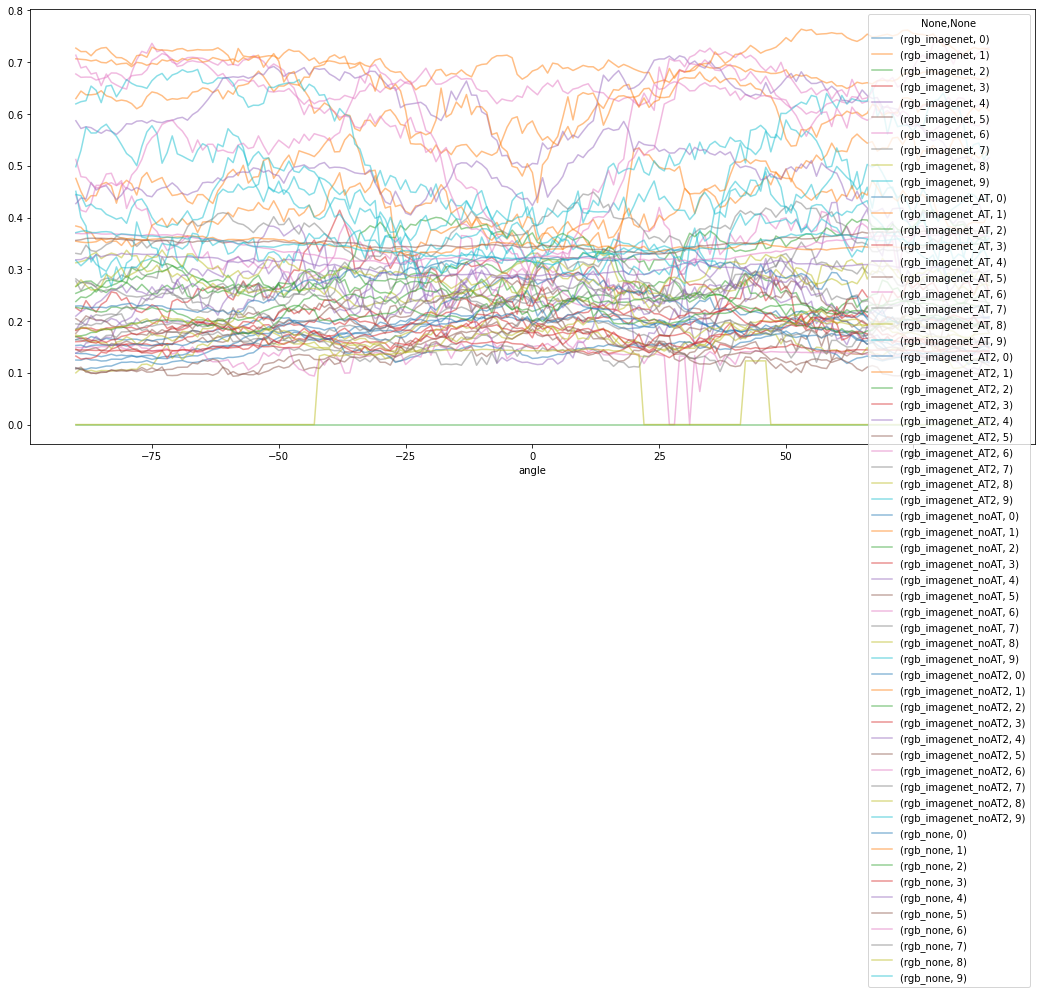

In [7]:
df = df_all_stats.set_index('angle', inplace=False)
fig, ax = plt.subplots(1, 1, figsize=(18,8))
df.groupby(['name','y_true'])['mean'].plot(legend=True, alpha=0.5)
plt.show()

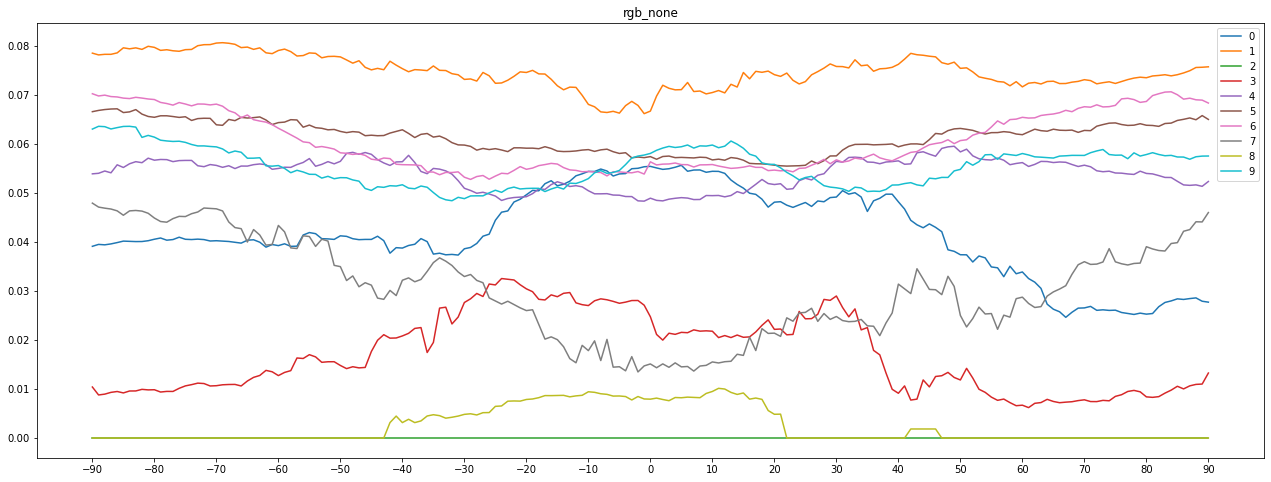

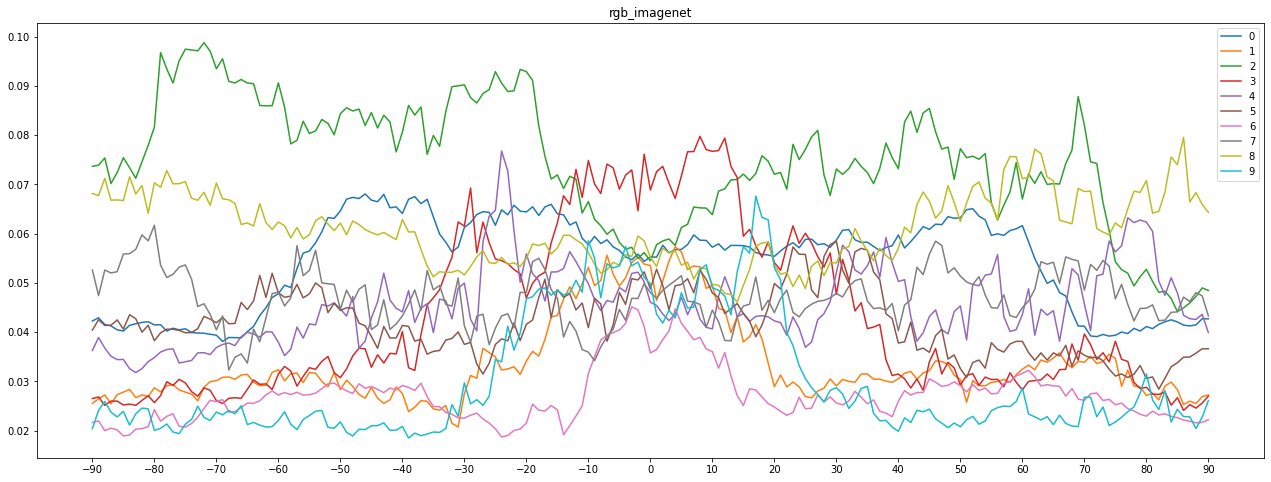

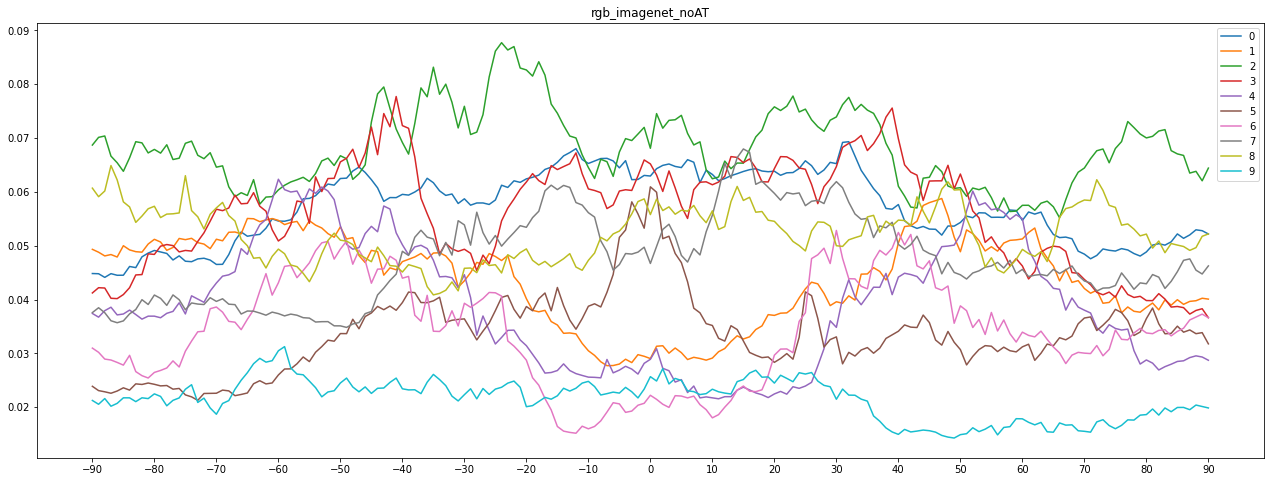

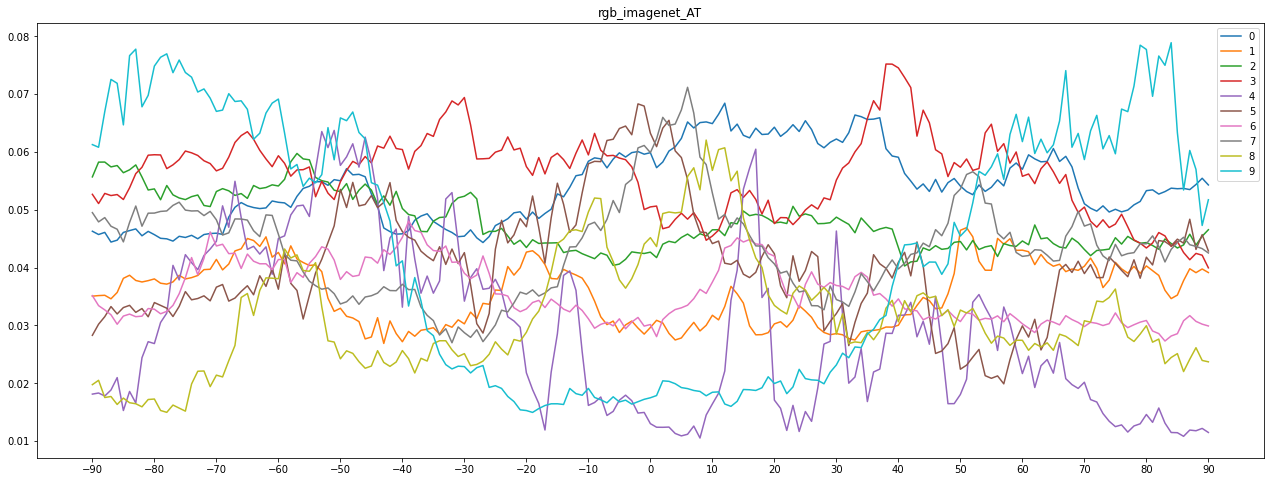

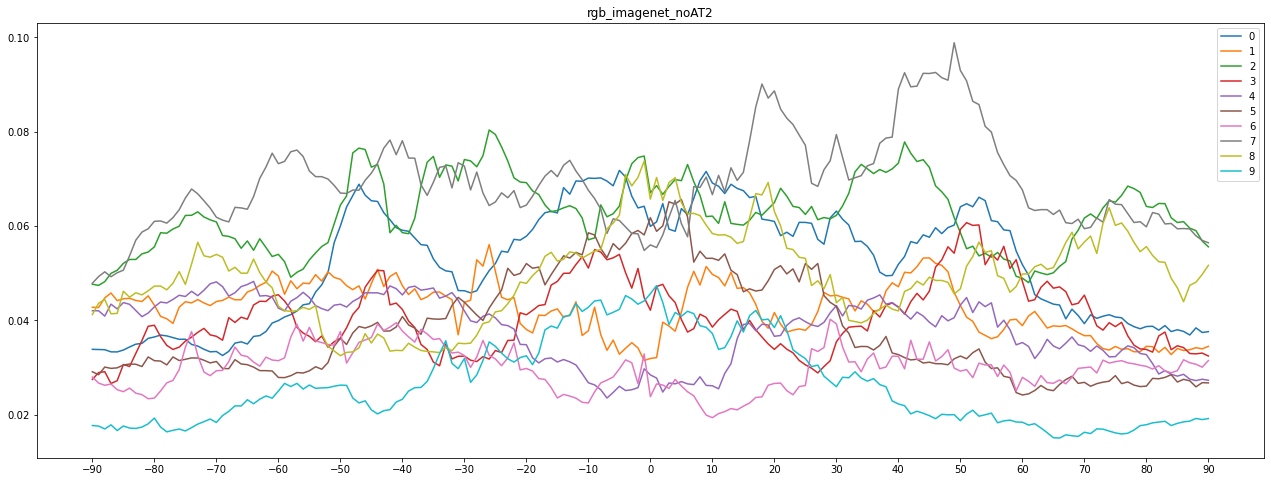

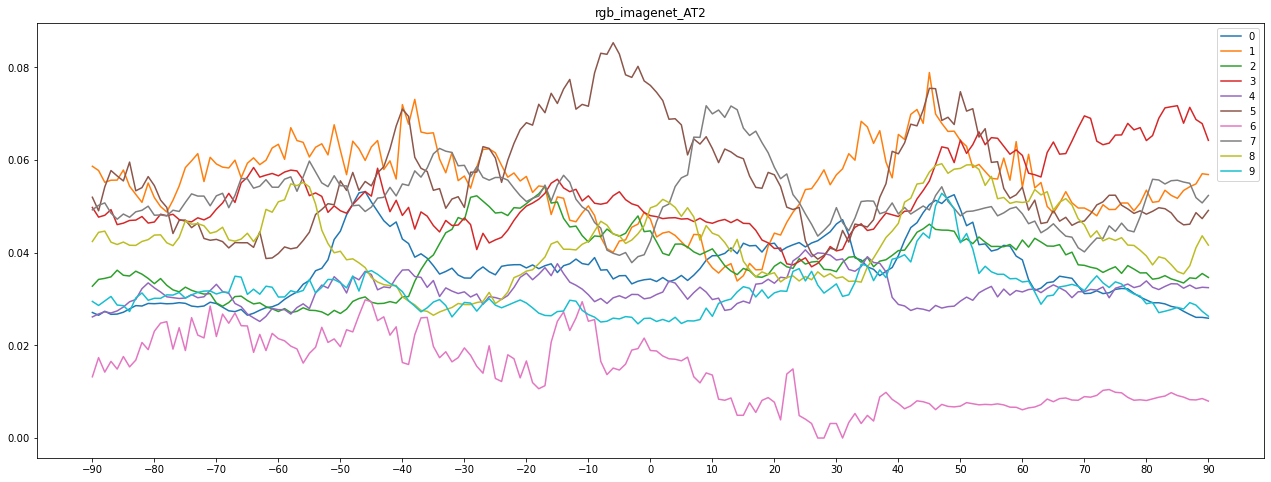

In [26]:
for model in df_all_stats['name'].unique():
    fig, ax = plt.subplots(figsize=(22,8))
    for key, grp in df_all_stats[df_all_stats['name'] == model].groupby(['y_true']):
        ax.plot(grp['angle'], grp['var'], label=key)

    ax.legend()
    plt.xticks(np.arange(-90, 90+1, step=10))
    plt.title(model)
    plt.show()